In [7]:
# --------------------
# 0. Google Drive 연동
# --------------------

print("Google Drive 연동 시작!")

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
print("Google Drive 연동 완료!")

# ✅ 한글 폰트 설치 및 설정 (Colab 재시작 시마다 실행 필요)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# 폰트 설치
!sudo apt-get install -y fonts-nanum

# 설치된 Nanum 폰트 경로 확인
font_dirs = ['/usr/share/fonts/truetype/nanum/']
font_files = fm.findSystemFonts(fontpaths=font_dirs)

# 폰트 매니저에 폰트 추가
for font_file in font_files:
    fm.fontManager.addfont(font_file)

# 폰트 이름 확인
nanum_font = fm.FontProperties(fname=font_files[0]).get_name()

# 폰트 설정
plt.rcParams['font.family'] = nanum_font
plt.rcParams['axes.unicode_minus'] = False

print(f"✅ 한글 폰트 설치 및 설정 완료! 적용 폰트: {nanum_font}")

Google Drive 연동 시작!
Mounted at /content/drive
Google Drive 연동 완료!
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
✅ 한글 폰트 설치 및 설정 완료! 적용 폰트: NanumGothicCoding


In [8]:
# ------------------
# 1. 라이브러리 설치
# ------------------

print("라이브러리 설치 시작!")
!pip install pandas matplotlib duckdb pyngrok streamlit --quiet
print("라이브러리 설치 완료!")

라이브러리 설치 시작!
라이브러리 설치 완료!


In [9]:
# -------------------------------
# 2. 데이터 로드 및 DuckDB 저장
# -------------------------------

print("\n🚀 기업 정보 데이터 로드 및 DuckDB 저장 시작!")

import pandas as pd
import matplotlib.pyplot as plt
import duckdb

# ✅ CSV 파일 경로 (Google Drive)
file_path = '/content/drive/MyDrive/company_analysis_sample_10000.csv'

# ✅ 데이터 로드
print("📊 CSV 파일에서 데이터 로딩 중...")
company_df = pd.read_csv(file_path, encoding='utf-8-sig')
print(f"✅ 데이터 로드 완료! 총 {len(company_df)} 행")

# ✅ DuckDB 연결
con = duckdb.connect(database='company_data.duckdb', read_only=False)

# ✅ DuckDB 저장
print("📁 DuckDB 에 데이터 저장 중...")
con.execute("CREATE OR REPLACE TABLE company_data AS SELECT * FROM company_df")
print("✅ DuckDB 저장 완료!")
con.close()


🚀 기업 정보 데이터 로드 및 DuckDB 저장 시작!
📊 CSV 파일에서 데이터 로딩 중...
✅ 데이터 로드 완료! 총 44771 행
📁 DuckDB 에 데이터 저장 중...
✅ DuckDB 저장 완료!


In [10]:
# ✅ 데이터 로드 및 DuckDB 연결
import pandas as pd
import duckdb

print("\n🚀 DuckDB 연결 및 데이터 로딩 중...")
con = duckdb.connect(database='company_data.duckdb', read_only=False)
company_df = con.execute("SELECT * FROM company_data").df()
con.close()
print("✅ 데이터 로딩 및 DuckDB 연결 종료!")


🚀 DuckDB 연결 및 데이터 로딩 중...
✅ 데이터 로딩 및 DuckDB 연결 종료!


In [11]:
# ✅ 성장성 계산: 매출 증가율 & 영업이익 증가율
print("\n🚀 성장성 계산 중...")
company_df = company_df.sort_values(by=['기업명', '기준연도'])
company_df['손익계산서_매출액'] = pd.to_numeric(company_df['손익계산서_매출액'], errors='coerce')
company_df['손익계산서_영업이익'] = pd.to_numeric(company_df['손익계산서_영업이익'], errors='coerce')

company_df['매출증가율'] = company_df.groupby(['기업명'])['손익계산서_매출액'].pct_change() * 100
company_df['영업이익증가율'] = company_df.groupby(['기업명'])['손익계산서_영업이익'].pct_change() * 100
print("✅ 성장성 계산 완료!")

# ✅ 수익성 계산: 영업이익률
print("\n🚀 수익성 계산 중...")
company_df['영업이익률'] = (company_df['손익계산서_영업이익'] / company_df['손익계산서_매출액']) * 100
print("✅ 수익성 계산 완료!")

# ✅ 계산된 데이터 DuckDB 에 저장
print("\n📁 DuckDB 에 갱신된 데이터 저장 중...")
con = duckdb.connect(database='company_data.duckdb', read_only=False)
con.execute("CREATE OR REPLACE TABLE company_data AS SELECT * FROM company_df")
con.close()
print("✅ DuckDB 저장 완료 및 연결 종료!")


🚀 성장성 계산 중...
✅ 성장성 계산 완료!

🚀 수익성 계산 중...
✅ 수익성 계산 완료!

📁 DuckDB 에 갱신된 데이터 저장 중...


<ipython-input-11-9e2e1f27fcf6>:7: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company_df['매출증가율'] = company_df.groupby(['기업명'])['손익계산서_매출액'].pct_change() * 100
<ipython-input-11-9e2e1f27fcf6>:8: FutureWarning: The default fill_method='ffill' in SeriesGroupBy.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  company_df['영업이익증가율'] = company_df.groupby(['기업명'])['손익계산서_영업이익'].pct_change() * 100


✅ DuckDB 저장 완료 및 연결 종료!


✅ 최신 연도 데이터 로딩 완료! 대상 기업 수: 456

🔄 데이터 클렌징 중 (무한대, NaN, 극단값 제거 ...)
✅ 데이터 클렌징 완료! 분석 대상 기업 수: 449
📈 평균 성장성 (매출 증가율): 12.48%
📊 평균 수익성 (영업이익률): -4.37%


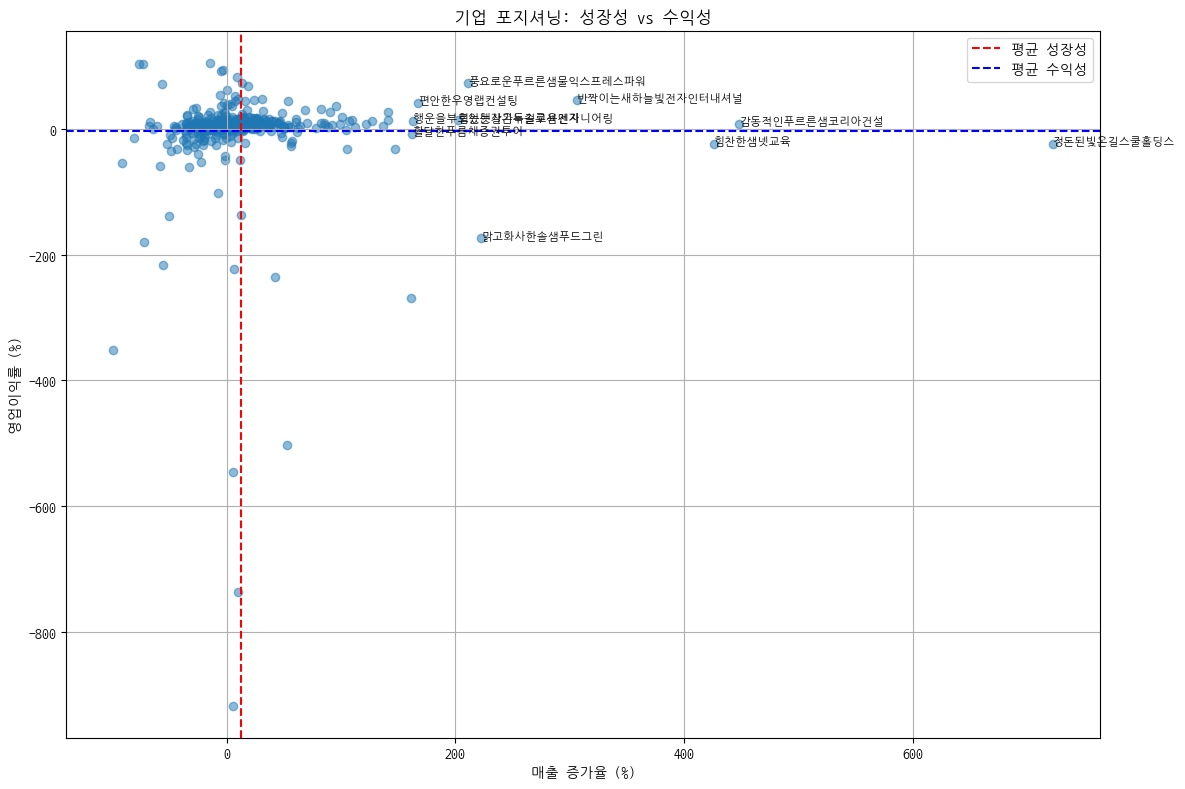

✅ 4분면 분석 시각화 완료!

🧭 4분면 분석 완료! 다음 단계로 넘어갑니다. (고급 분석 또는 대시보드 구현)

📊 성장성 & 수익성 모두 높은 Top 20 기업:


,순위,기업명,기준연도,매출증가율,영업이익률
0,1,감동적인푸르른샘코리아건설,2024,448.57%,8.13%
1,2,반짝이는새하늘빛전자인터내셔널,2024,306.35%,45.32%
2,3,풍요로운푸르른샘물익스프레스파워,2024,211.39%,72.52%
3,4,힘있는가온누솔루션전자,2024,202.11%,13.67%
4,5,편안한우영랩컨설팅,2024,167.33%,40.96%
5,6,행운을부르는햇살가득길교육엔지니어링,2024,162.79%,12.67%
6,7,깔끔한포근한온하우징케어,2024,141.24%,14.07%
7,8,충실한푸른하늘팜스튜디오,2024,140.72%,27.16%
8,9,힘있는사랑온길랜드상,2024,136.39%,5.01%
9,10,풍요롭고행복한영우네트웍스팩토리,2024,127.04%,12.03%


In [12]:
# 4분면 분석

# ✅ DuckDB 재연결 및 최신 연도 데이터 로딩
con = duckdb.connect(database='company_data.duckdb', read_only=False)
query = """
    SELECT *
    FROM company_data
    WHERE 기준연도 = (SELECT MAX(기준연도) FROM company_data)
    AND 매출증가율 IS NOT NULL
    AND 영업이익률 IS NOT NULL
"""
latest_df = con.execute(query).df()
con.close()

print(f"✅ 최신 연도 데이터 로딩 완료! 대상 기업 수: {len(latest_df)}")

# ✅ 데이터 클렌징 (무한대, NaN, 극단값 제거)
print("\n🔄 데이터 클렌징 중 (무한대, NaN, 극단값 제거 ...)")
latest_df = latest_df.replace([float('inf'), float('-inf')], pd.NA)
latest_df = latest_df.dropna(subset=['매출증가율', '영업이익률'])
latest_df = latest_df[(latest_df['매출증가율'].abs() <= 1000) & (latest_df['영업이익률'].abs() <= 1000)]
print(f"✅ 데이터 클렌징 완료! 분석 대상 기업 수: {len(latest_df)}")

# ✅ 평균 값 계산 (4분면 기준)
avg_growth = latest_df['매출증가율'].mean()
avg_profitability = latest_df['영업이익률'].mean()
print(f"📈 평균 성장성 (매출 증가율): {avg_growth:.2f}%")
print(f"📊 평균 수익성 (영업이익률): {avg_profitability:.2f}%")

# ✅ 시각화
plt.figure(figsize=(12, 8))

# 🔹 산점도
plt.scatter(latest_df['매출증가율'], latest_df['영업이익률'], alpha=0.5)

# 🔹 4분면 기준선
plt.axvline(x=avg_growth, color='red', linestyle='--', label='평균 성장성')
plt.axhline(y=avg_profitability, color='blue', linestyle='--', label='평균 수익성')

# 📌 텍스트 라벨 추가 (상위 10개 기업만)
top_companies = latest_df.nlargest(10, '매출증가율')
for _, row in top_companies.iterrows():
    plt.text(row['매출증가율'], row['영업이익률'], row['기업명'], fontsize=8)

plt.title('기업 포지셔닝: 성장성 vs 수익성')
plt.xlabel('매출 증가율 (%)')
plt.ylabel('영업이익률 (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("✅ 4분면 분석 시각화 완료!")
print("\n🧭 4분면 분석 완료! 다음 단계로 넘어갑니다. (고급 분석 또는 대시보드 구현)")

# ✅ 성장성 수익성이 모두 높은 상위 20개 기업 테이블 출력
high_growth_profit = latest_df[
    (latest_df['매출증가율'] > avg_growth) & (latest_df['영업이익률'] > avg_profitability)
].sort_values(by=['매출증가율', '영업이익률'], ascending=False).head(20)

print("\n📊 성장성 & 수익성 모두 높은 Top 20 기업:")
from tabulate import tabulate

# ✅ 성장성 & 수익성 모두 높은 Top 20 기업 테이블 출력 (pandas Styler 활용)
top_companies = high_growth_profit.copy().reset_index(drop=True)
top_companies['순위'] = range(1, len(top_companies) + 1)

# 📍 포맷팅: 소수점 2자리, % 추가
top_companies['매출증가율'] = top_companies['매출증가율'].apply(lambda x: f"{x:.2f}%")
top_companies['영업이익률'] = top_companies['영업이익률'].apply(lambda x: f"{x:.2f}%")

# 📍 컬럼 순서 정리
top_companies = top_companies[['순위', '기업명', '기준연도', '매출증가율', '영업이익률']]

# ✅ Styler 로 출력
top_companies.style.set_table_attributes("style='display:inline'").set_caption("📊 성장성 & 수익성 모두 높은 Top 20 기업 🚀")




🔄 DuckDB 연결 및 데이터 로딩 중...
✅ 데이터 로딩 및 DuckDB 연결 종료!


<ipython-input-13-e96fc086501c>:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothicCoding.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) NanumGothicCoding.
  fig.canvas.print_figure(bytes_io, **kw)


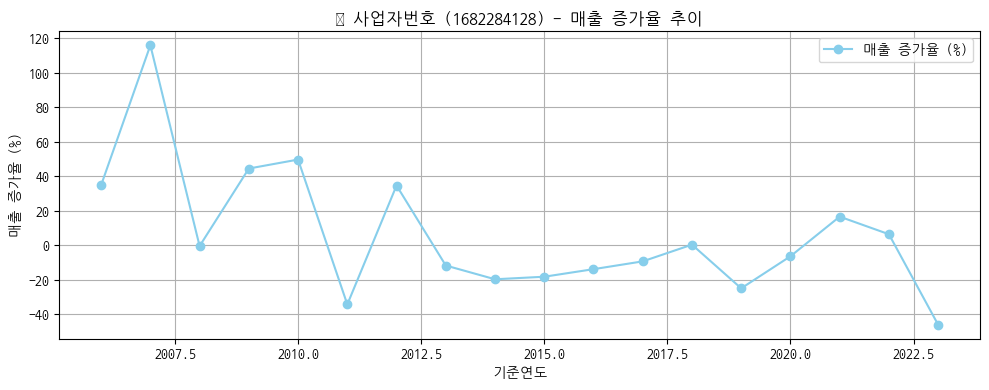

<ipython-input-13-e96fc086501c>:49: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothicCoding.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) NanumGothicCoding.
  fig.canvas.print_figure(bytes_io, **kw)


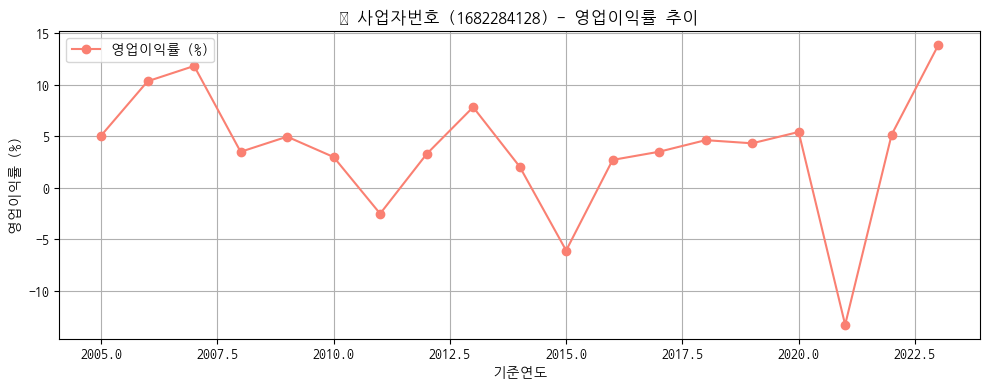

✅ 기업별 시계열 분석 완료!


In [13]:
# 기업별 데이터 시각화

# ✅ 기업별 성장성 / 수익성 시계열 시각화 (사업자번호 기준 + DuckDB에서 조회)
import matplotlib.pyplot as plt
import duckdb

# ✅ 데이터 로드 및 DuckDB 연결
import pandas as pd

print("\n🔄 DuckDB 연결 및 데이터 로딩 중...")
con = duckdb.connect(database='company_data.duckdb', read_only=False)

# 분석할 기업 사업자번호 선택 (예: '8060888191')
selected_biz_no = '1682284128'

# ✅ DuckDB 에서 데이터 조회
query = f"""
SELECT *
FROM company_data
WHERE 사업자번호 = '{selected_biz_no}'
ORDER BY 기준연도
"""

selected_company_df = con.execute(query).df()

# ✅ DuckDB 접속 종료
con.close()
print("✅ 데이터 로딩 및 DuckDB 연결 종료!")

# ✅ 매출 증가율 시계열
plt.figure(figsize=(10, 4))
plt.plot(selected_company_df['기준연도'], selected_company_df['매출증가율'], marker='o', linestyle='-', label='매출 증가율 (%)', color='skyblue')
plt.title(f"📈 사업자번호 ({selected_biz_no}) - 매출 증가율 추이")
plt.xlabel("기준연도")
plt.ylabel("매출 증가율 (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# ✅ 영업이익률 시계열
plt.figure(figsize=(10, 4))
plt.plot(selected_company_df['기준연도'], selected_company_df['영업이익률'], marker='o', linestyle='-', label='영업이익률 (%)', color='salmon')
plt.title(f"📉 사업자번호 ({selected_biz_no}) - 영업이익률 추이")
plt.xlabel("기준연도")
plt.ylabel("영업이익률 (%)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print("✅ 기업별 시계열 분석 완료!")


In [18]:
# 서비스 실행

# ngrok으로 공개 URL 생성 (Authtoken 필요)
from pyngrok import ngrok

# 여기에 발급받은 ngrok authtoken 입력하세요!
NGROK_AUTH_TOKEN = "2w1lMu0vDS1pgY2wDQ0d4mJ8IyP_2Jim9cP1bo2r65A59DGmo"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

print("[INFO] ngrok 터널 생성 중...")
public_url = ngrok.connect(addr="8501", proto="http")
print(f"[INFO] Streamlit 앱 Public URL: {public_url}")

# Streamlit 앱 실행
!streamlit run app.py --server.port 8501 --server.enableCORS false

print("[INFO] Streamlit 웹 서비스가 실행되었습니다. 위의 Public URL을 클릭하여 접속하세요!")

[INFO] ngrok 터널 생성 중...
[INFO] Streamlit 앱 Public URL: NgrokTunnel: "https://6997-35-196-209-98.ngrok-free.app" -> "http://localhost:8501"
2025-04-22 05:02:24.045 
As a result, 'server.enableCORS' is being overridden to 'true'.

More information:
In order to protect against CSRF attacks, we send a cookie with each request.
To do so, we must specify allowable origins, which places a restriction on
cross-origin resource sharing.

If cross origin resource sharing is required, please disable server.enableXsrfProtection.
            



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.209.98:8501

  Stopping...
  Stopping...
[INFO] Streamlit 웹 서비스가 실행되었습니다. 위의 Public URL을 클릭하여 접속하세요!
